In [ ]:
# from preprocessed_mnist import load_dataset
# X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

# print(X_train.shape, y_train.shape)
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.imshow(X_train[0], cmap="Greys");

In [ ]:
# data = load_dataset()

In [2]:
import pickle

In [ ]:
# with open("dataset.pickle","wb") as f:
#     pickle.dump(data,f)

In [3]:
with open("dataset.pickle","rb") as f:
    data=pickle.load(f)

### TF

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = data

In [6]:
X_train=X_train.reshape([50000,28*28])
X_test=X_test.reshape([10000,28*28])
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [21]:
X = tf.placeholder(tf.float32,shape=(None,784),name='X')
Y = tf.placeholder(tf.float32, shape=(None, 10), name='Y')
W1 = tf.Variable(tf.truncated_normal([784,130],stddev=0.1),name='W1')
b1 = tf.Variable(tf.truncated_normal([130],stddev=0.1),name='b1')
Z1 = tf.matmul(X,W1,name='Z1') + b1

A2 = tf.nn.relu(Z1)
W2 = tf.Variable(tf.truncated_normal([130,130],stddev=0.1),name='W1')
Z2 = tf.matmul(A2,W2,name='Z2')

prob = tf.placeholder(tf.float32, name='prob')
h_drop = tf.nn.dropout(Z2,prob, name='drop')

W3 = tf.Variable(tf.truncated_normal((130,10),stddev=0.1),name='W2')
b3 = tf.Variable(tf.truncated_normal([10],stddev=0.1),name='b2')
y = tf.nn.sigmoid(tf.matmul(h_drop,W3)+b3,name='y') 

In [12]:
y_ = tf.placeholder(tf.float32,shape=(None,10))
loss = - tf.reduce_mean(tf.reduce_sum(y_*tf.log(y)))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

In [13]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [14]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
import tqdm

In [22]:
batch_size = 500
num_epoch = 20
test_err = []
train_err = []
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for epoch in tqdm.tqdm_notebook(range(num_epoch)):
        for i in range(0, 50000, batch_size):
            s.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size], keep_prob : 0.65})        
        train_err.append(s.run(loss, {X:X_train, y_:y_train, prob:1}))
        test_err.append(s.run(loss, {X:X_test, y_:y_test, prob:1}))
        
    predict_op = tf.argmax(y, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

NameError: name 'keep_prob' is not defined

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
epoch = list(range(num_epoch))
plt.plot(epoch, train_err, label='Train')
plt.plot(epoch, test_err, label='Test')
plt.ylabel('train err')
plt.xlabel('epoch')
plt.show()    

### TF GITHUB 

In [8]:
X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))
keep_prob = tf.placeholder(tf.float32)
W1 = tf.get_variable("W1",  [784, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",  [128], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2",  [128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",  [128], initializer=tf.zeros_initializer())
W3 = tf.get_variable("W3", [128, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3",  [10], initializer=tf.zeros_initializer())


In [9]:
Z1 = tf.matmul(X, W1)+b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W2)+b2
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W3)+b3
A3 = tf.nn.sigmoid(Z3)

In [10]:
def compute_cost(A3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))
    return cost

In [11]:
cost = compute_cost(A3, Y)
starter_learning_rate = 0.00036
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.85, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [12]:
import tqdm


Test cost after 10 epochs: 1.51402
Test cost after 20 epochs: 1.49467



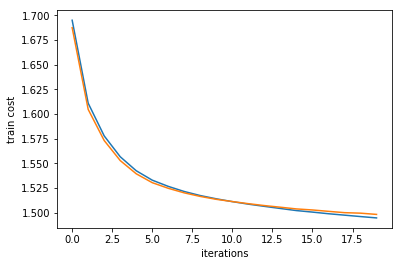

Train Accuracy: 0.96
Test Accuracy: 0.9541


In [14]:
batch_size = 500
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_costs = []
    test_costs = []
    for epoch in tqdm.tqdm_notebook(range(20)):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size], keep_prob : 0.65})
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train, keep_prob : 1}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test, keep_prob : 1}))
        if epoch%10 == 9:
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
    iterations = list(range(20))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)